## User_List

: 고객에 대한 전반적인 정보가 들어있는 파일

In [1]:
from ml_config import *

### 1. Data Load

In [2]:
user_list = pd.read_csv('../data/user_list.csv')
user_list.tail()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash
22868,2011-12-12 15:42,f,24,NaN,NaN,2f0a2f36a9f63b6ba2fa3a7e53bef906
22869,2011-08-10 0:49,m,41,NaN,Kyoto,6ae7811a9c7c58546d6a1567ab098c21
22870,2012-04-05 12:24,f,35,NaN,NaN,a417308c6a79ae0d86976401ec2e3b04
22871,2011-02-20 10:34,f,59,NaN,NaN,4937ec1c86e71d901c4ccc0357cff0b1
22872,2011-02-24 15:43,f,38,NaN,Saitama Prefecture,280f0cedda5c4b171ee6245889659571


#### Note :

1. Column은 REG_DATE	SEX_ID,	AGE, WITHDRAW_DATE, PREF_NAME, USER_ID_hash (총 6개)로 이뤄짐
2. Column별 데이터 타입이 다양함

### 2. Overall EDA

In [3]:
user_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
REG_DATE         22873 non-null object
SEX_ID           22873 non-null object
AGE              22873 non-null int64
WITHDRAW_DATE    922 non-null object
PREF_NAME        15617 non-null object
USER_ID_hash     22873 non-null object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


#### Note :

1. WITHDRQW_DATE(탈퇴일) 갯수가 922개는 탈퇴한 ID 갯수가 922개라는 의미
2. PREF_NAME(거주지역) 입력을 안한 ID가 있음을 알 수 있음

|Column Name  |Description           |Translation   | Type      |Length|Decimal|	Note|
|-|-|-|-|-|
|USER_ID_hash |User ID               |아이디  |VARCHAR232|      |       |                             |
|REG_DATE     |Registered date       |가입일  |DATE      |      |       | Sign up date                |
|SEX_ID       |Gender                |성별   |CHAR      |1     |	   |f = female　m = male          |
|AGE          |Age                   |나이   |NUMBER	  |4     |0	   |                             |
|WITHDRAW_DATE|Unregistered date     |탈퇴일  |DATE      |      |	   |	 	                     |
|PREF_NAME    |Residential Prefecture|거주지역|VARCHAR22  |      |	   |[JPN] Not registered if empty|

In [4]:
user_list.describe()

,AGE
count,22873.000000
mean,42.497836
std,11.843465
min,15.000000
25%,33.000000
50%,41.000000
75%,51.000000
max,80.000000


In [5]:
# Unique한 갯수
for i in range(0, 5+1):
    print('{} : {}'.format(user_list.columns[i], len(set(user_list[user_list.columns[i]]))))

REG_DATE : 21924
SEX_ID : 2
AGE : 66
WITHDRAW_DATE : 904
PREF_NAME : 48
USER_ID_hash : 22873


#### Note :

1. SEX_ID(성별)은 남/여로 이루어졌음을 알 수 있음
2. AGE(나이)는 66개로 이루어져 있는것으로 보아 전반적인 연령대가 다 있음을 유추할 수 있음 
3. PREF_NAME(현)의 갯수가 최소 48개라는 것을 알 수 있음
4. USER_ID_hash(아이디)의 unique한 갯수와 데이터의 갯수가 같기 때문에 아이디는 고유값임

### 3. REG_DATE EDA (등록일)

In [6]:
# 날짜를 나눠서 보기
user_list["REG_DATE"] = pd.to_datetime(user_list["REG_DATE"]) # date_time으로 변환
user_list["REG_YEAR"] = user_list["REG_DATE"].dt.year # 년
user_list["REG_MONTH"] = user_list["REG_DATE"].dt.month # 월
user_list["REG_WEEKDAY"] = user_list["REG_DATE"].dt.weekday # 일
user_list["REG_HOUR"] = user_list["REG_DATE"].dt.hour # 시간
user_list.tail()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash,REG_YEAR,REG_MONTH,REG_WEEKDAY,REG_HOUR
22868,2011-12-12 15:42:00,f,24,NaN,NaN,2f0a2f36a9f63b6ba2fa3a7e53bef906,2011,12,0,15
22869,2011-08-10 00:49:00,m,41,NaN,Kyoto,6ae7811a9c7c58546d6a1567ab098c21,2011,8,2,0
22870,2012-04-05 12:24:00,f,35,NaN,NaN,a417308c6a79ae0d86976401ec2e3b04,2012,4,3,12
22871,2011-02-20 10:34:00,f,59,NaN,NaN,4937ec1c86e71d901c4ccc0357cff0b1,2011,2,6,10
22872,2011-02-24 15:43:00,f,38,NaN,Saitama Prefecture,280f0cedda5c4b171ee6245889659571,2011,2,3,15


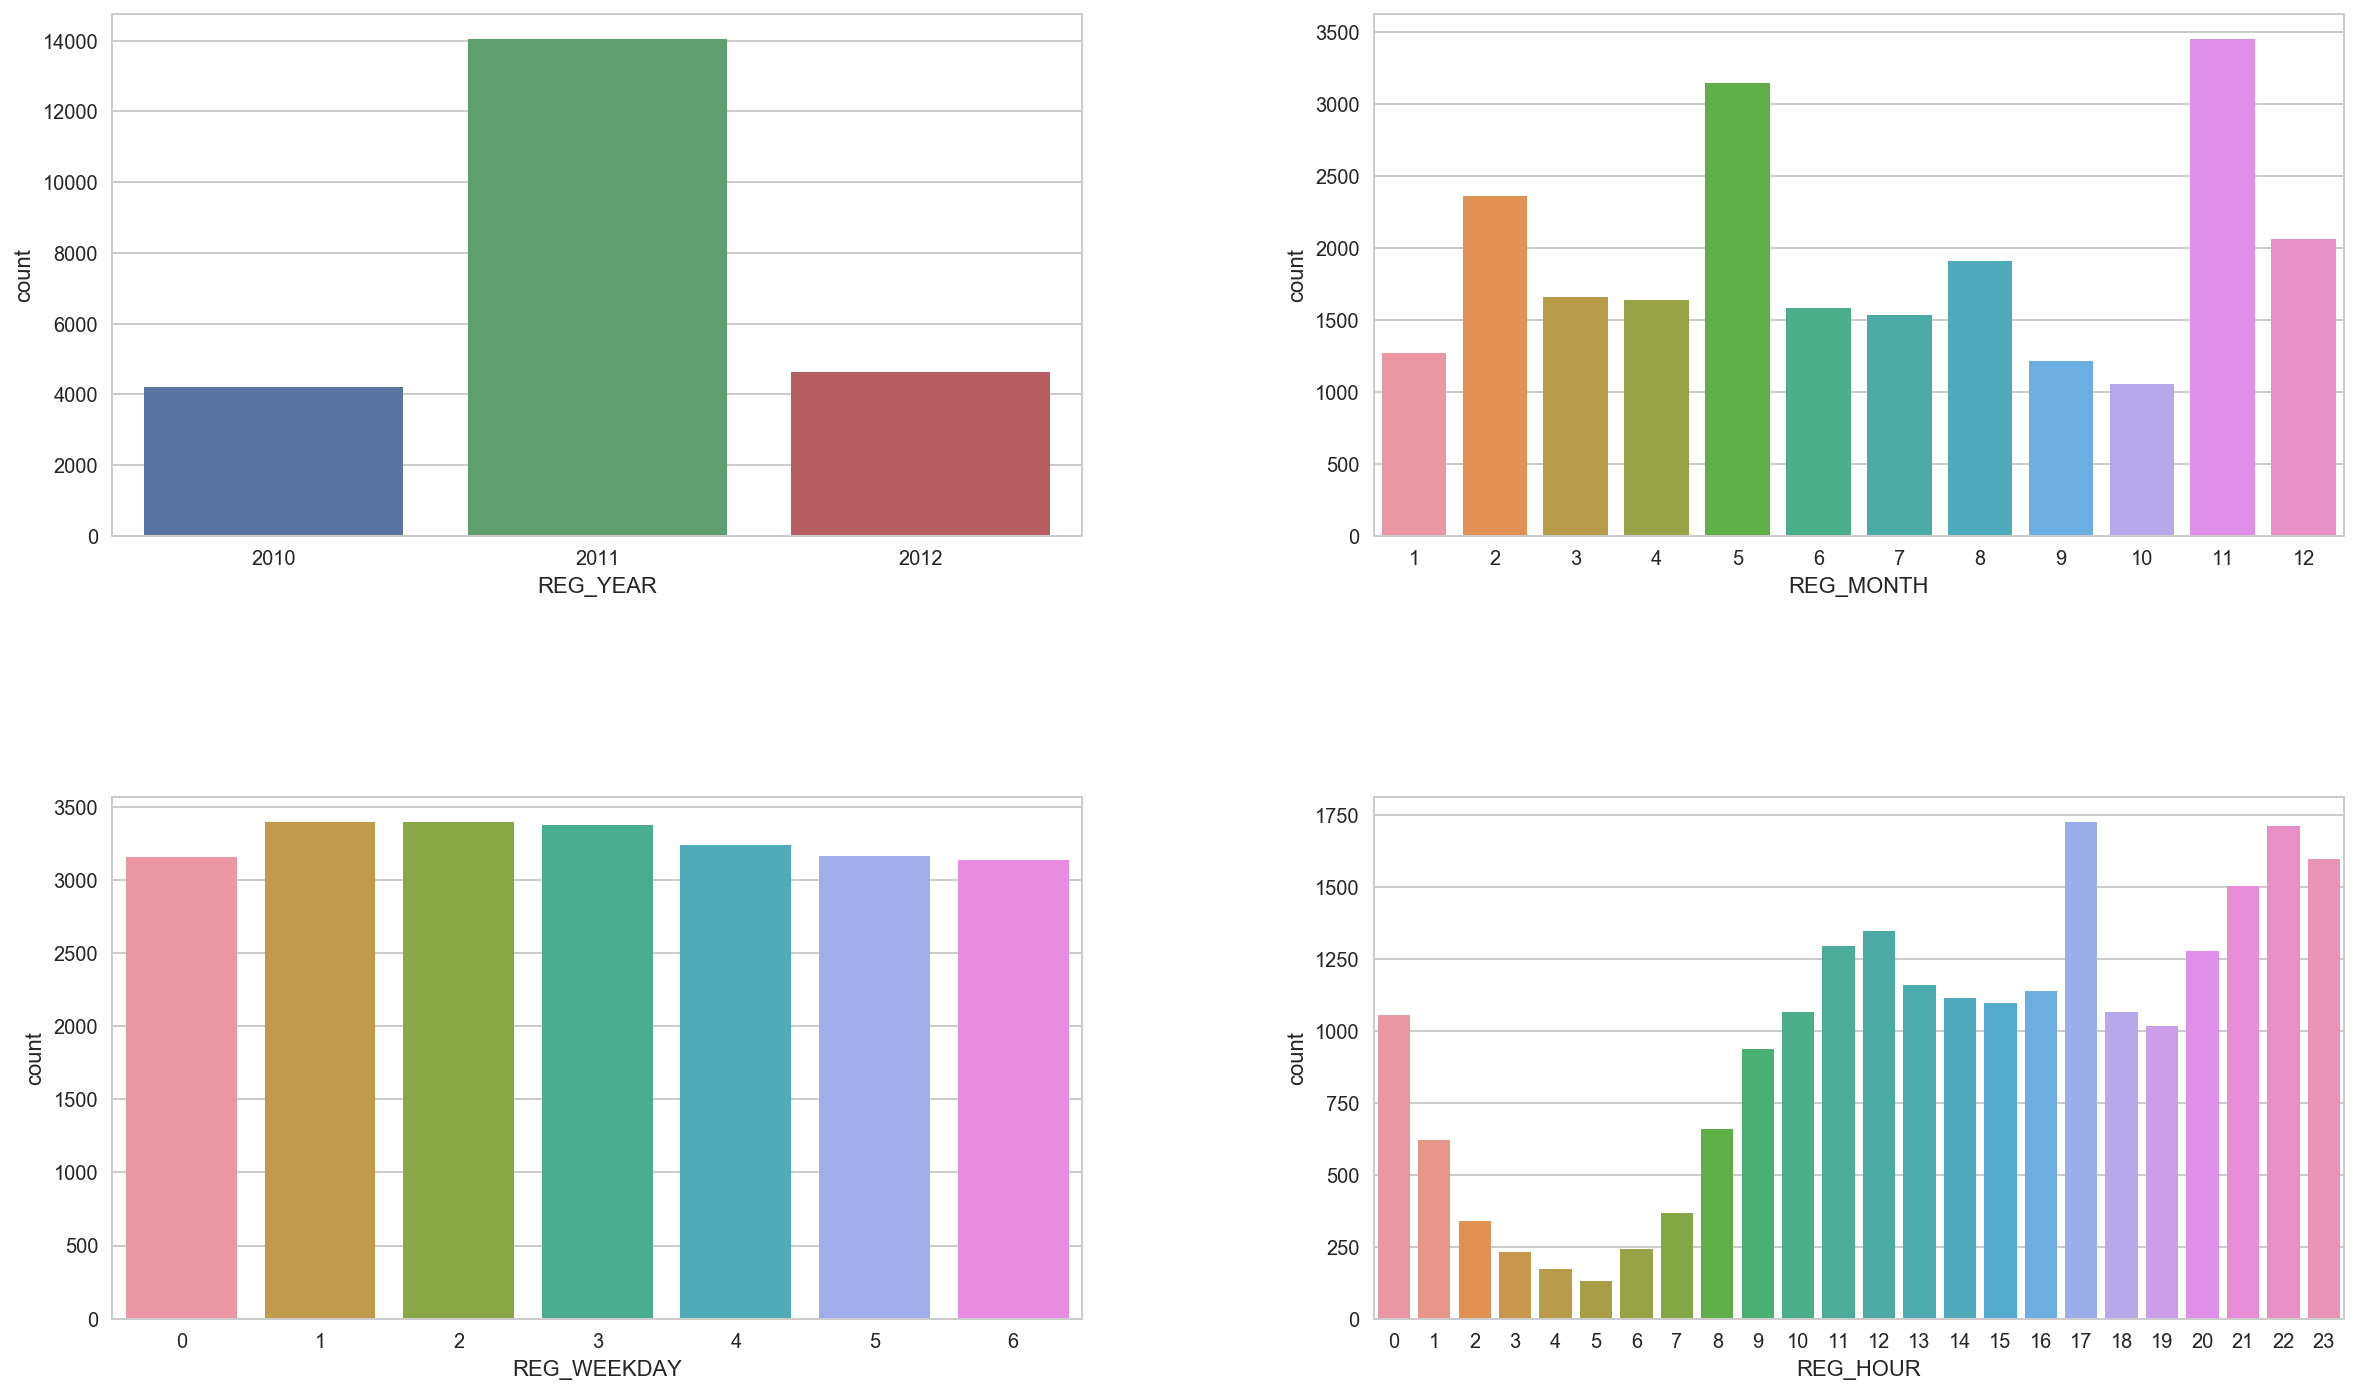

In [7]:
# countplot
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2,2,i-5)
    sns.countplot(x = user_list.columns[i], data = user_list)
    
plt.show()

#### Note :

1. 년도별 가입수는 2011년이 다른 년도에 비해 월등히 가입수가 많음
2. 월별 가입수는 11월, 5월, 2월이 다른 월에 비해 두드러지게 가입수가 많음
3. 요일별 가입수는 크게 차이가 없음
4. 시간별 가입수는 17시, 22시, 23시가 많고, 새벽시간대(1시~6시)에 적음

### 4. SEX_ID (성별)

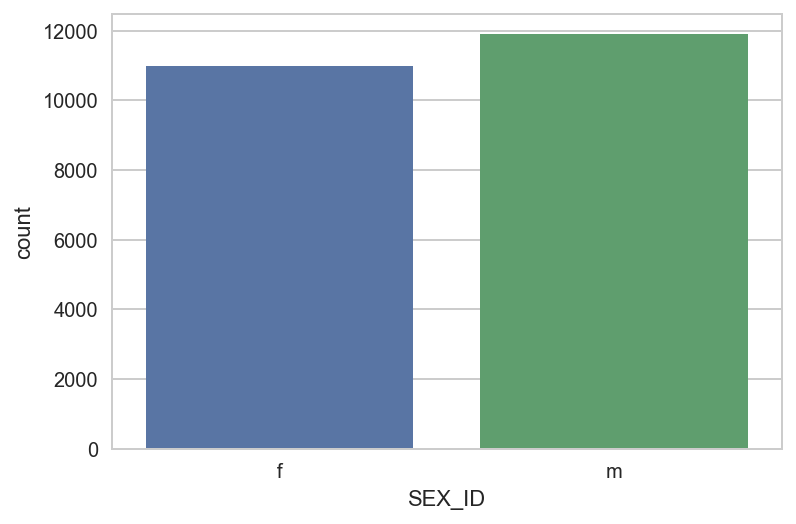

In [8]:
sns.countplot(x = 'SEX_ID', data = user_list)
plt.show()

#### Note :

1. 남/여 중 가입수는 남자가 더 많음
2. 차이가 별로 없어 유의미해 보이진 않음

### 5. AGE (나이)

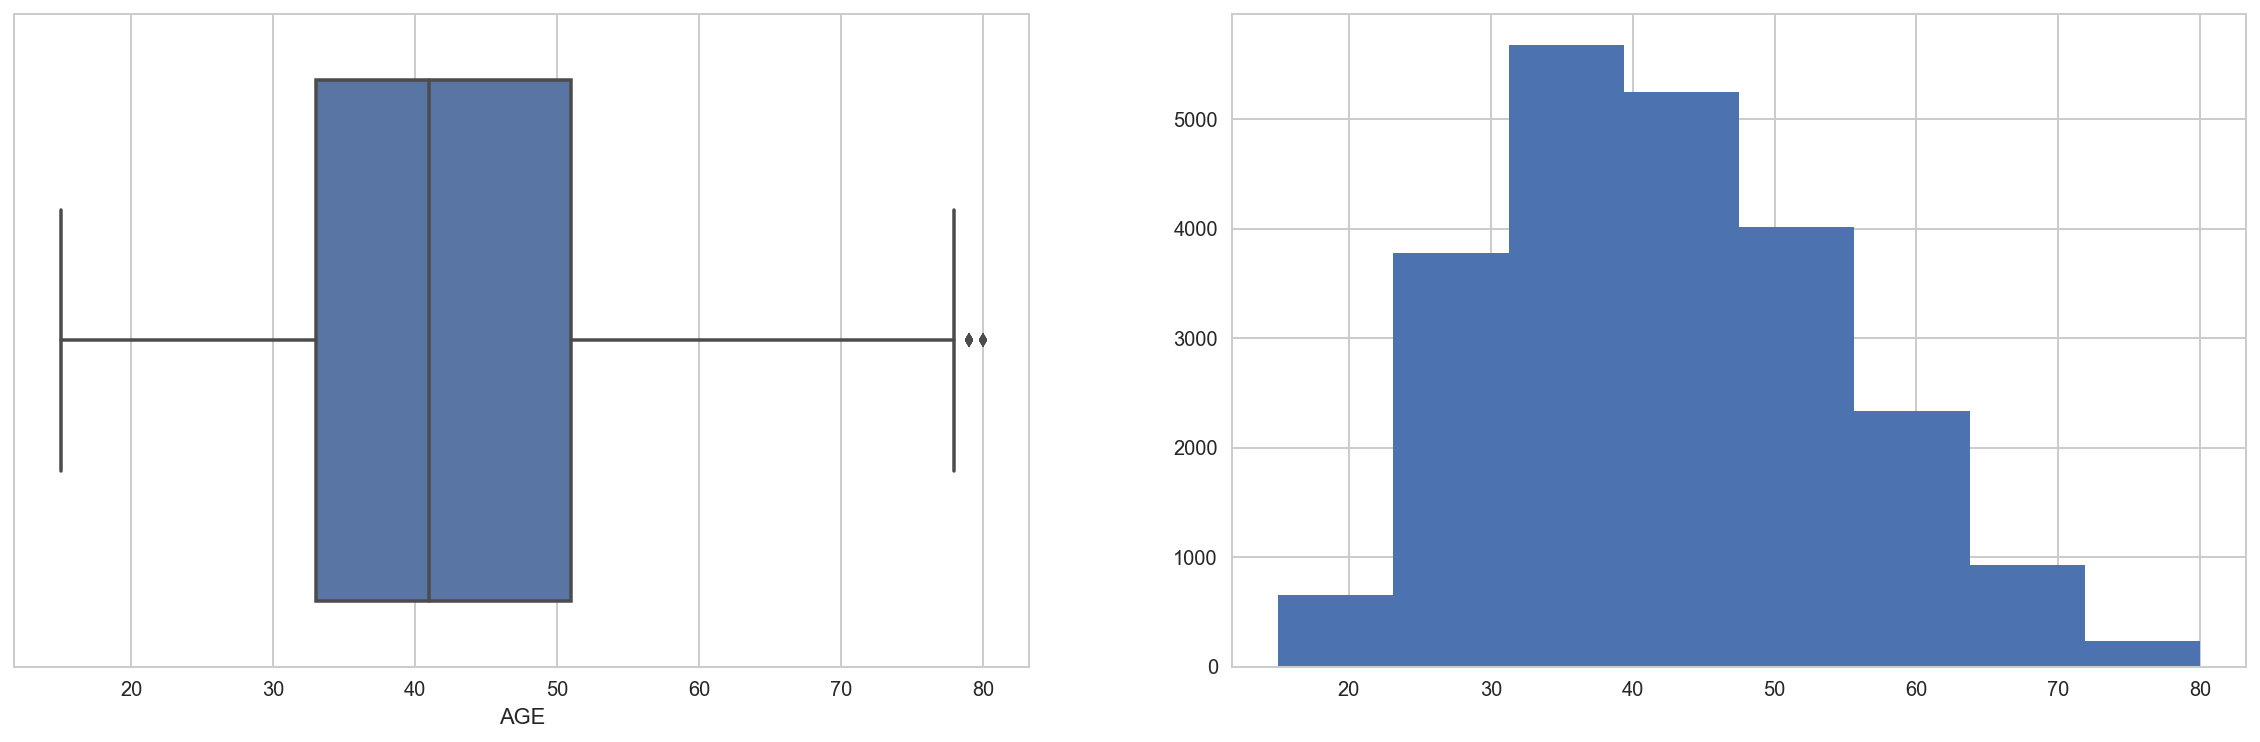

count    22873.000000
mean        42.497836
std         11.843465
min         15.000000
25%         33.000000
50%         41.000000
75%         51.000000
max         80.000000
Name: AGE, dtype: float64


In [9]:
# AGE Boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.boxplot(user_list['AGE'])

plt.subplot(1,2,2)
plt.hist(user_list['AGE'], bins = 8)

plt.show()

print(user_list['AGE'].describe())

#### Note :

1. 연령대는 15세부터 80세까지 이뤄짐
2. 30대, 40대 가입수가 가장 많음

### 6. WITHDRAW_DATE (탈퇴일)

In [10]:
# 날짜를 나눠서 보기
user_list["WITHDRAW_DATE"] = pd.to_datetime(user_list["WITHDRAW_DATE"]) 
user_list["WD_YEAR"] = user_list["WITHDRAW_DATE"].dt.year # 년
user_list["WD_MONTH"] = user_list["WITHDRAW_DATE"].dt.month # 월
user_list["WD_WEEKDAY"] = user_list["WITHDRAW_DATE"].dt.weekday # 일
user_list["WD_HOUR"] = user_list["WITHDRAW_DATE"].dt.hour # 시간

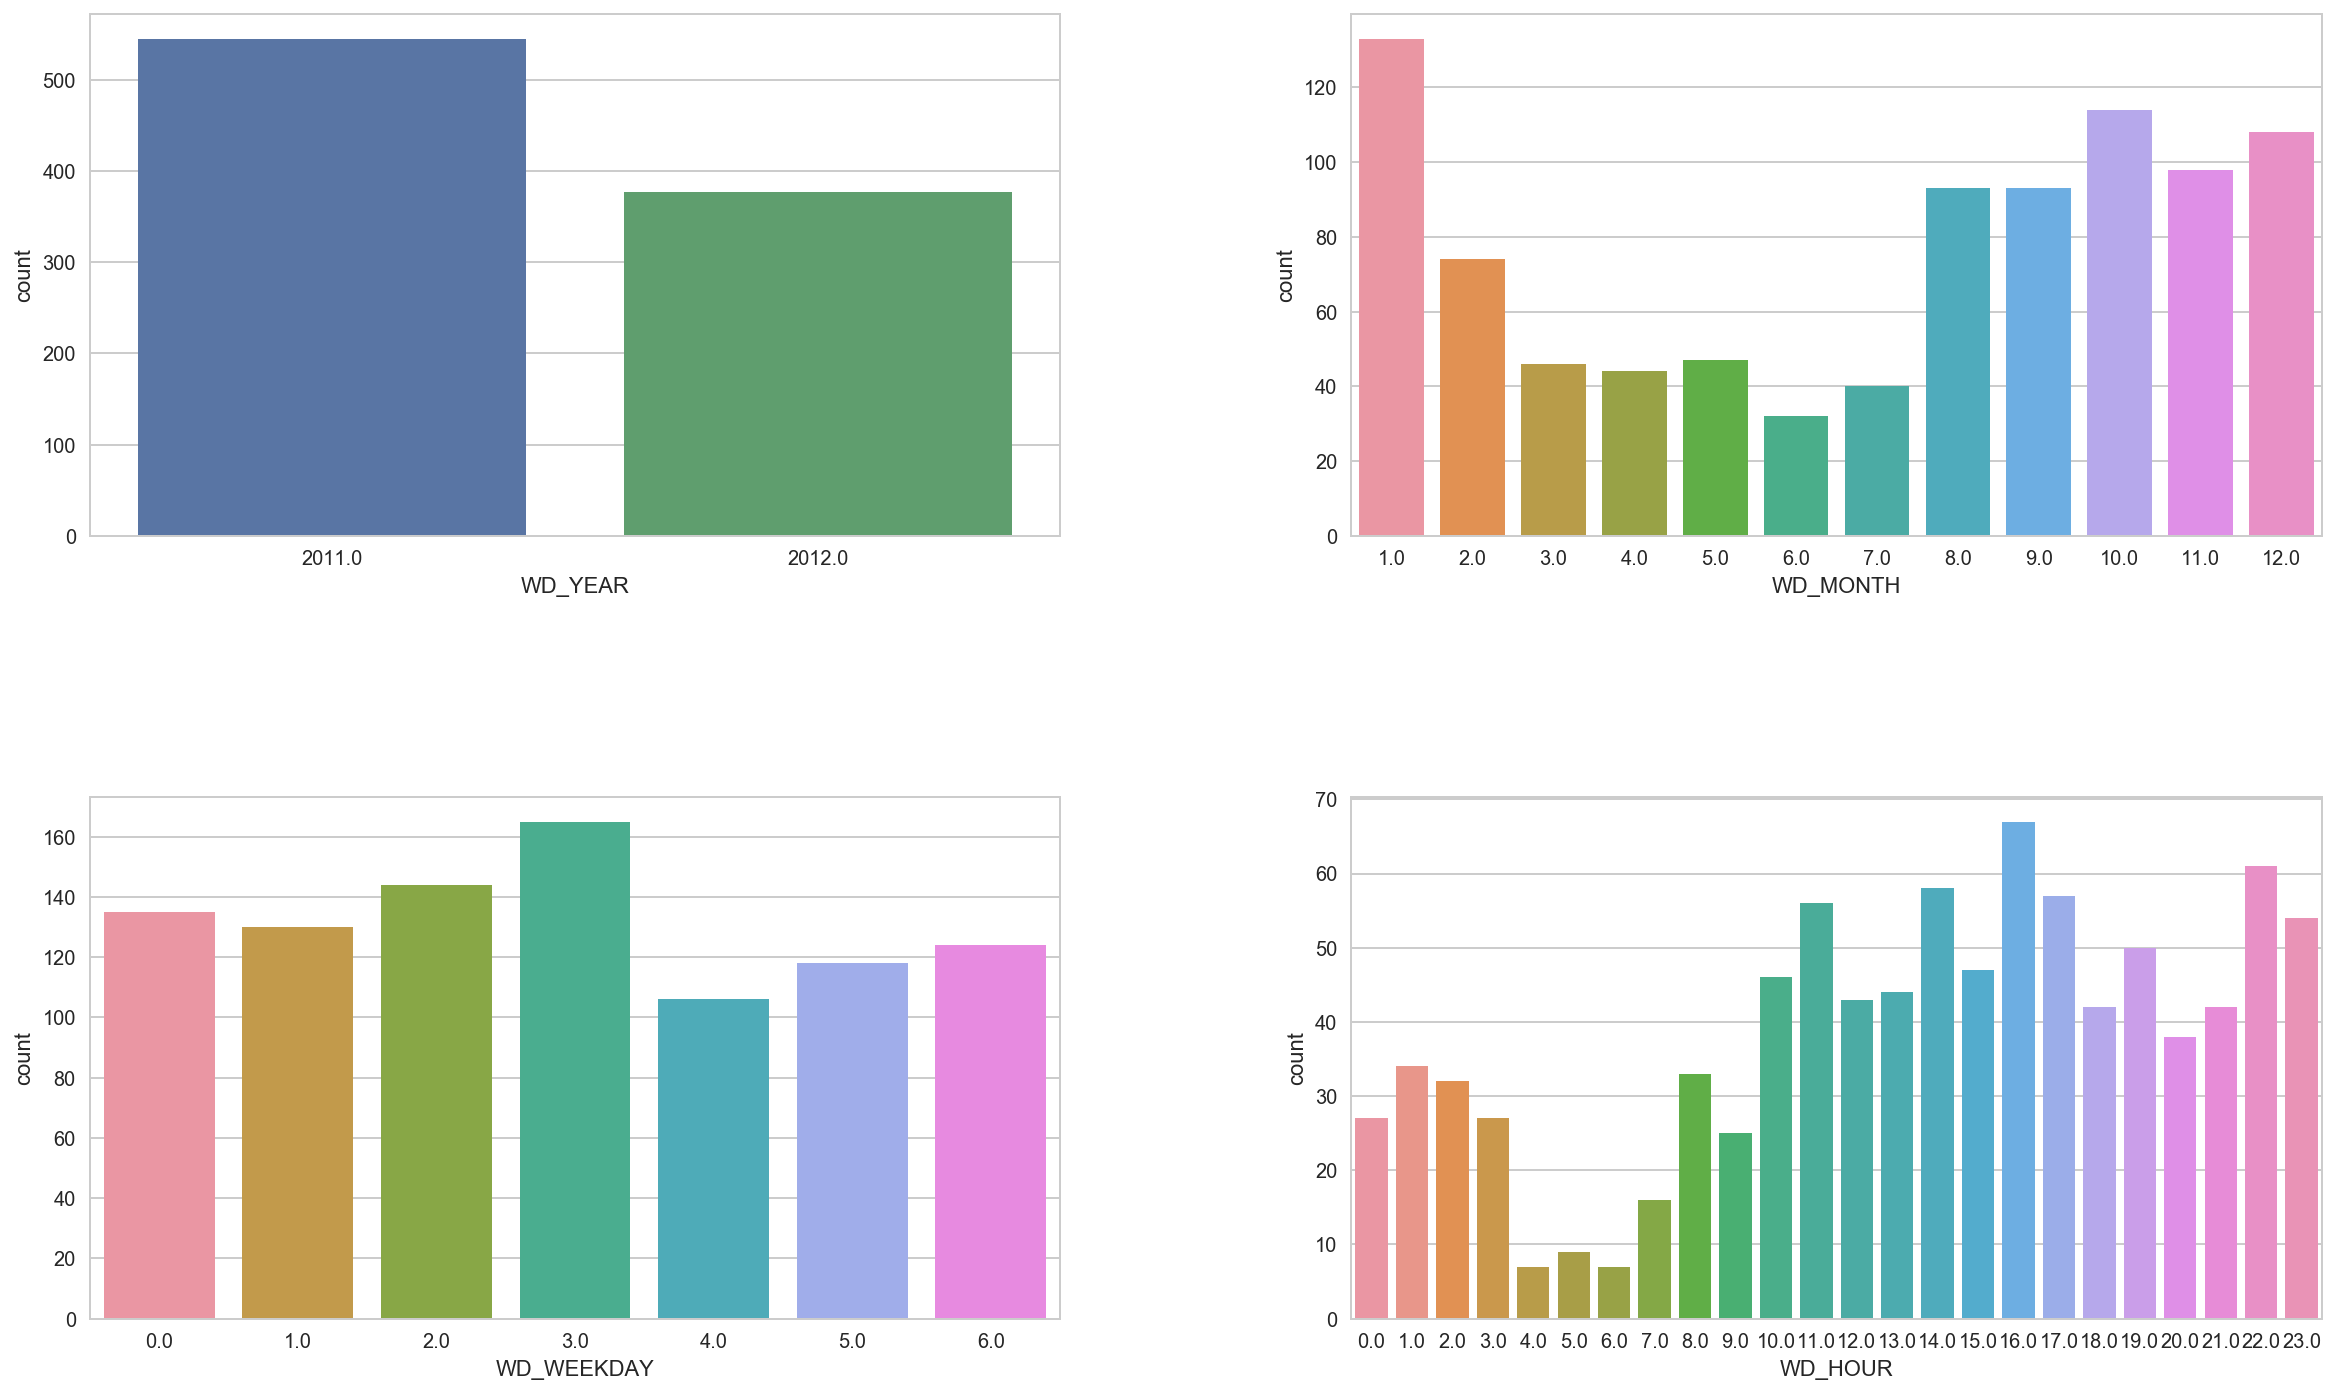

In [11]:
# normal distribution
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2,2,i-9)
    sns.countplot(x = user_list.columns[i], data = user_list)
    
plt.show()

#### Note :

1. 년도별 탈퇴수는 2011년이 많음
2. 월별 탈퇴수는 하반기에 많음
3. 요일별 탈퇴수는 크게 차이가 없음
4. 시간별 탈퇴수는 시간별 가입수와 비슷한 양상을 보임

### 7. PREF_NAME (행정구역)

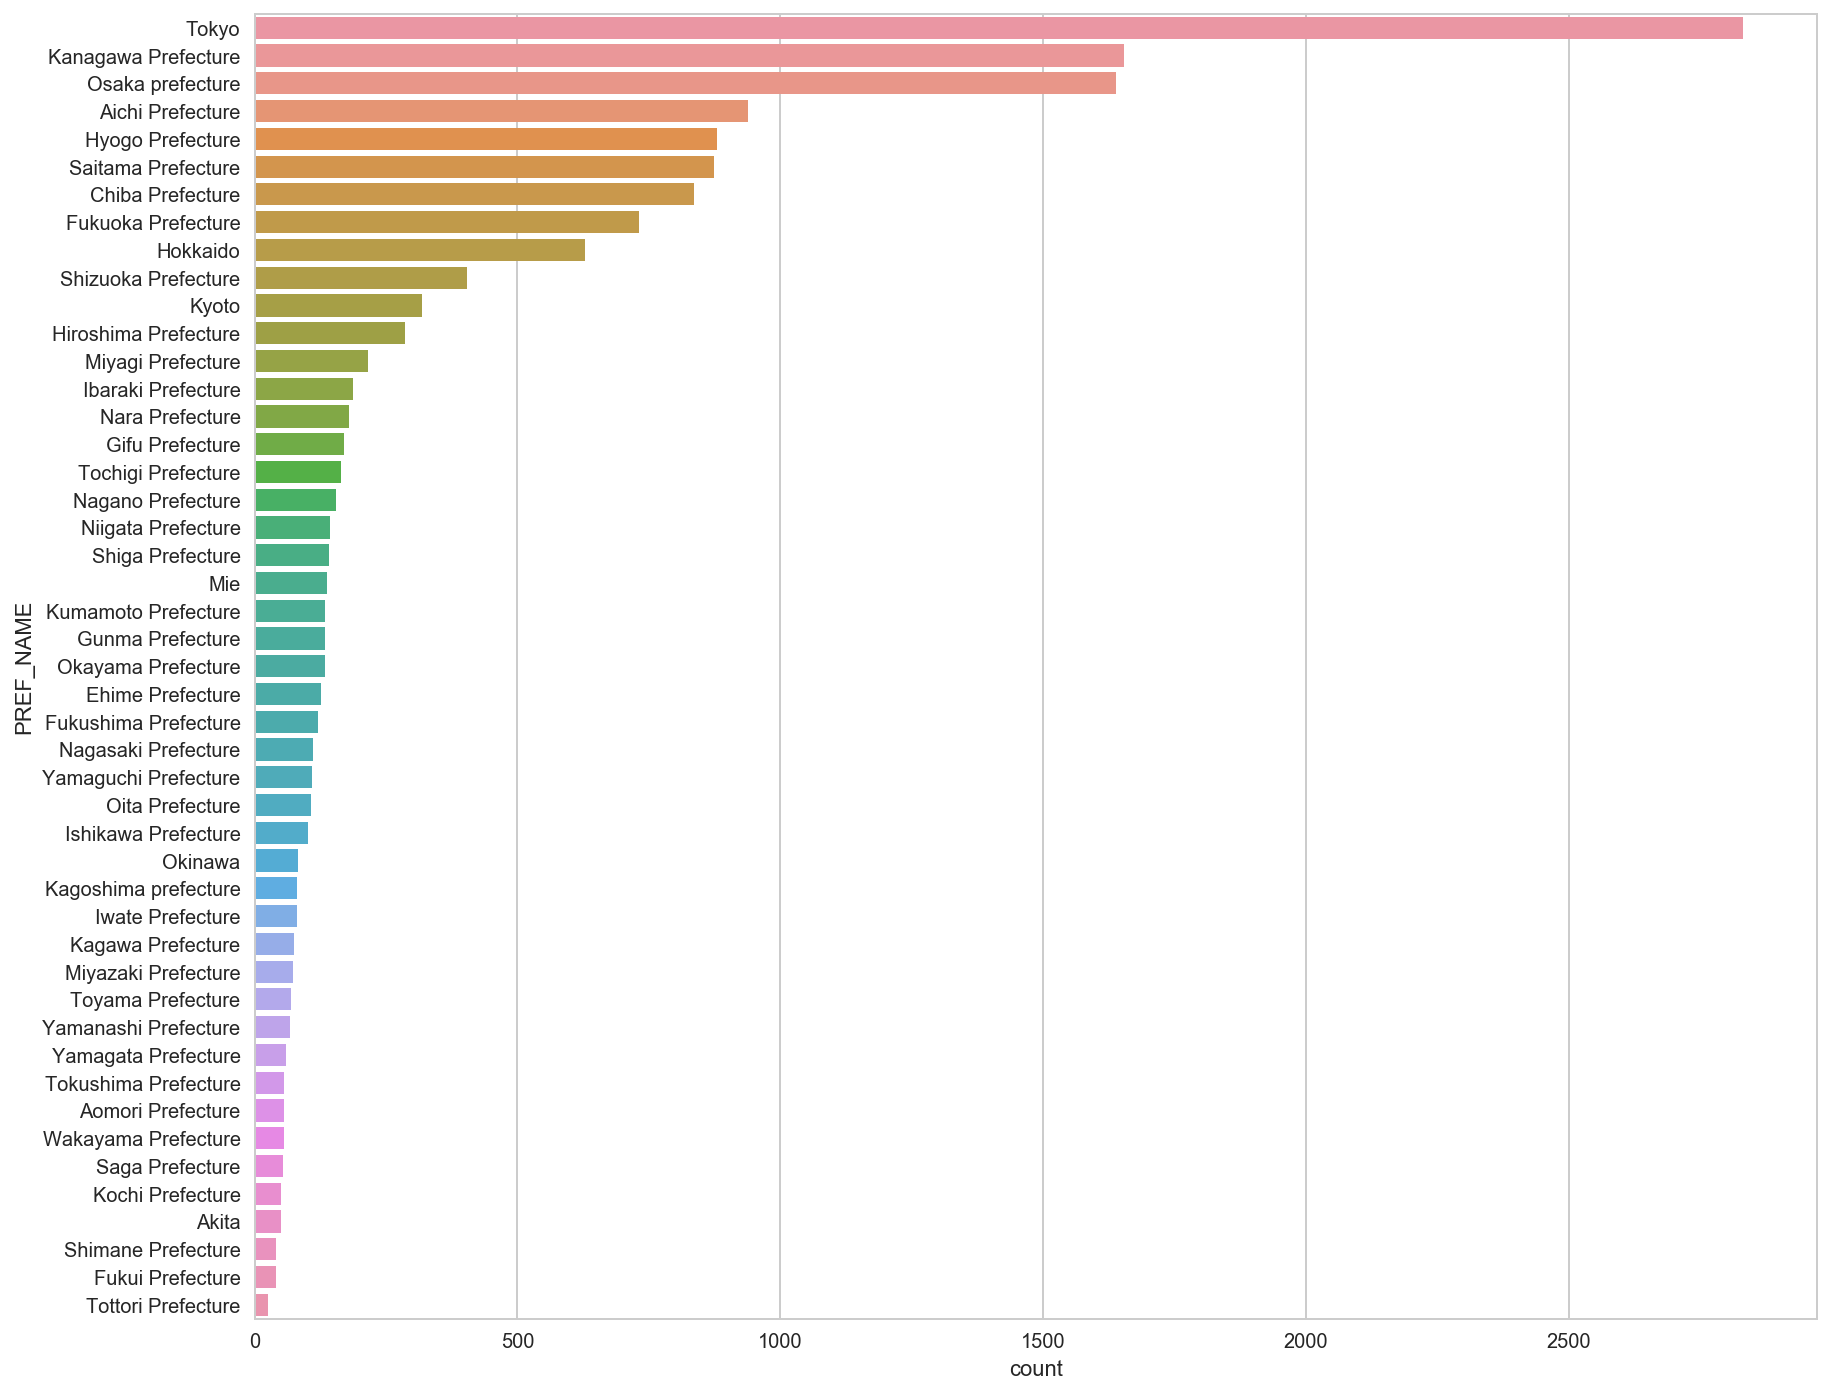

In [16]:
# countplot PREF_NAME
plt.figure(figsize=(14, 12))
sns.countplot(y = user_list['PREF_NAME'], data = user_list, order = user_list['PREF_NAME'].value_counts().index)
plt.show()

#### Note :

1. Tokyo(도쿄), Kanagawa Prefecture(가나가와 현), Osaka Prefecture(오사카 현) 등이 다른 현에 비해 두드러지게 큼
2. 지역별 가입 편차가 큼

### 8. Correlation

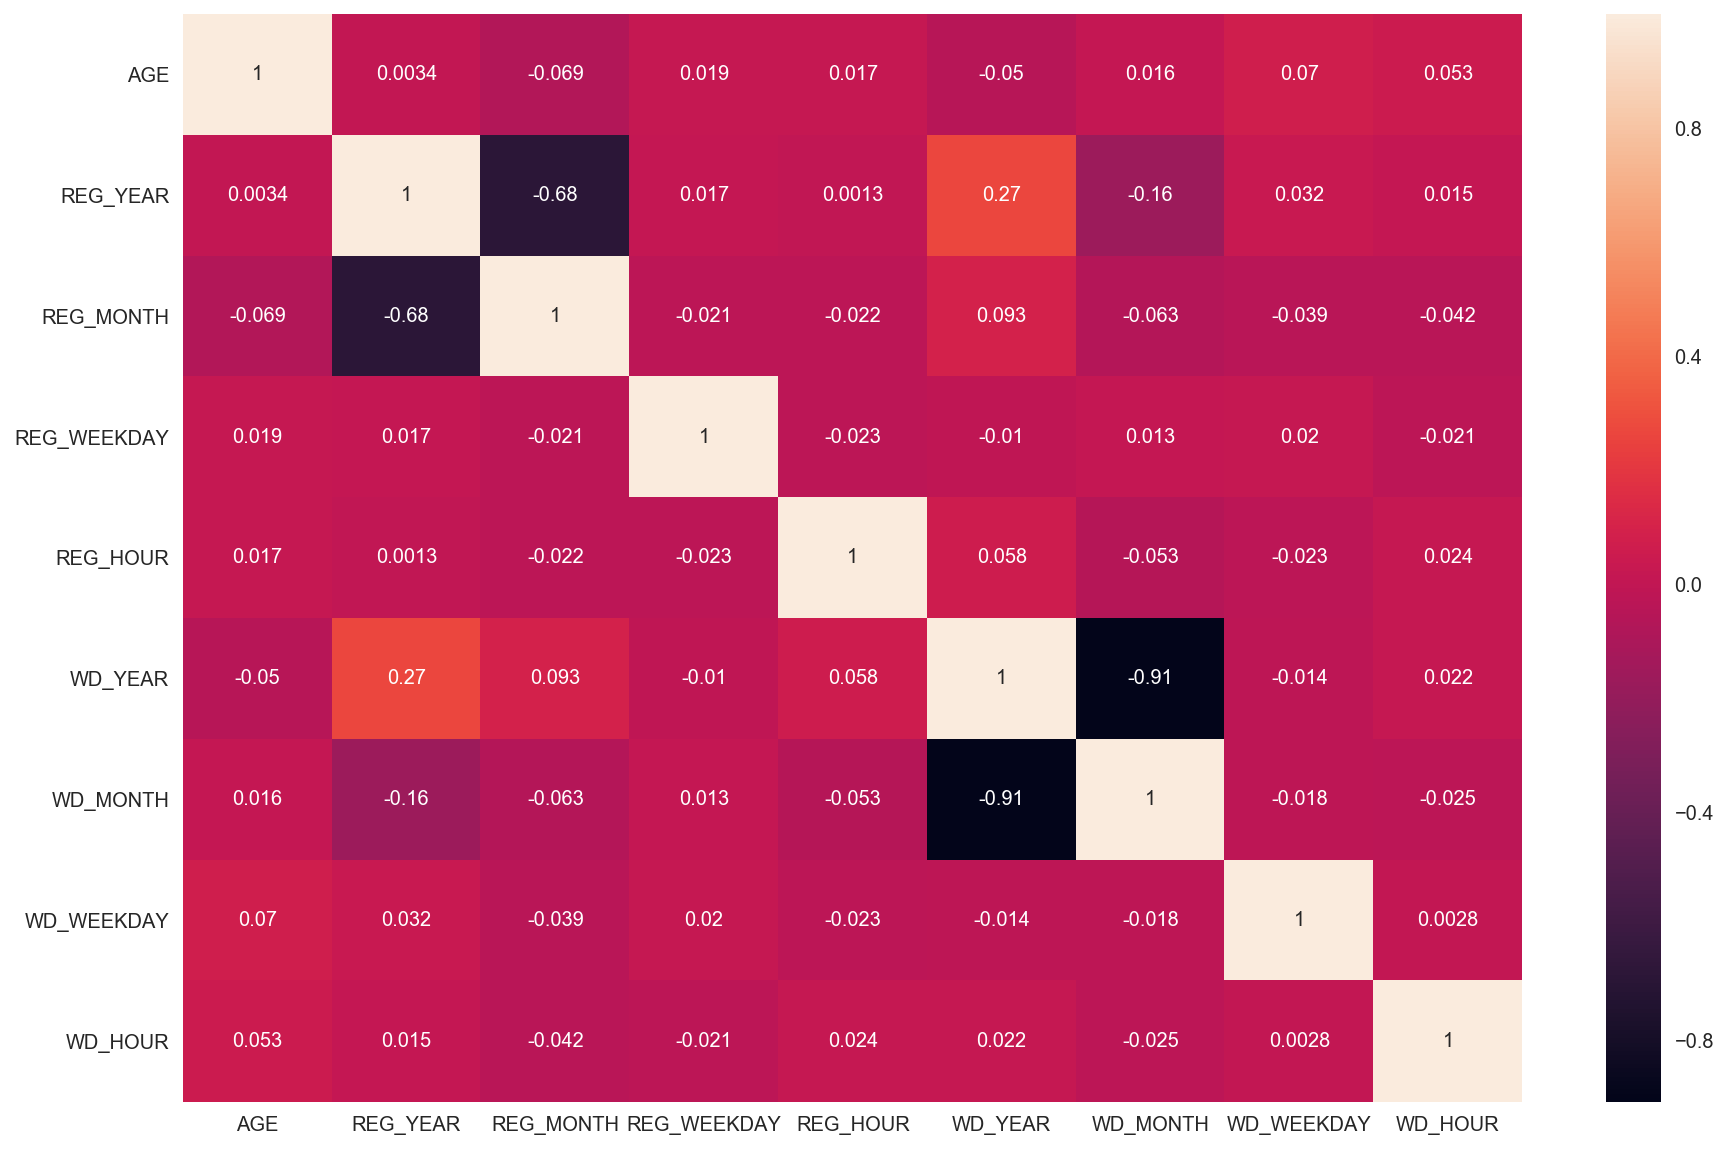

In [13]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(user_list.corr(), annot=True)
plt.show()

#### Note :

1. REG_MONTH와 REG_YEAR, WD_MONTH와 WD_YEAR가 연관성이 높음
2. 의미있는 상관관계는 없는것으로 보임